<a href="https://colab.research.google.com/github/Nisha-sah/Concepts-and-Technologies-of-AI/blob/main/Workshop7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [17]:
import pandas as pd
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Load dataset
data = fetch_openml(name="california_housing", version=1, as_frame=True)
X = data.data
y = data.target

# Step 1: One-hot encode categorical features
X = pd.get_dummies(X)  # converts 'ocean_proximity' to numeric

# Step 2: Handle missing values
X = X.fillna(X.mean())  # replace NaNs with mean

# Step 3: Split into train/test
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Step 4: Baseline Model Train Linear Regression
lr = LinearRegression()
lr.fit(X_train, y_train)

# Predictions
y_train_pred = lr.predict(X_train)
y_test_pred = lr.predict(X_test)

# Evaluate
train_mse = mean_squared_error(y_train, y_train_pred)
test_mse = mean_squared_error(y_test, y_test_pred)

print("Train MSE:", train_mse)
print("Test MSE:", test_mse)


Train MSE: 4683203783.504253
Test MSE: 4904399775.949276


In [19]:
# Step 2a: Ridge Regression
ridge = Ridge()
ridge_params = {'alpha': [0.01, 0.1, 1, 10, 100]}
grid_ridge = GridSearchCV(ridge, ridge_params, cv=5)
grid_ridge.fit(X_train, y_train)

print("\nRidge Regression")
print("Best alpha:", grid_ridge.best_params_)
ridge_best = grid_ridge.best_estimator_
ridge_test_pred = ridge_best.predict(X_test)
print("Test MSE:", mean_squared_error(y_test, ridge_test_pred))
print("Coefficients:", ridge_best.coef_)

# Step 2b: Lasso Regression
lasso = Lasso(max_iter=10000)
lasso_params = {'alpha': [0.01, 0.1, 1, 10, 100]}
grid_lasso = GridSearchCV(lasso, lasso_params, cv=5)
grid_lasso.fit(X_train, y_train)

print("\nLasso Regression")
print("Best alpha:", grid_lasso.best_params_)
lasso_best = grid_lasso.best_estimator_
lasso_test_pred = lasso_best.predict(X_test)
print("Test MSE:", mean_squared_error(y_test, lasso_test_pred))
print("Coefficients:", lasso_best.coef_)



Ridge Regression
Best alpha: {'alpha': 1}
Test MSE: 4905748341.882271
Coefficients: [-2.68593237e+04 -2.54935491e+04  1.10256454e+03 -6.02078887e+00
  1.02913149e+02 -3.81758827e+01  4.81177962e+01  3.94718263e+04
 -1.40454952e+04 -1.91679737e+04 -1.06192478e+04 -5.37920644e+04
  9.76247812e+04]


/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.728e+11, tolerance: 1.755e+10
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.870e+11, tolerance: 1.779e+10
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.466e+11, tolerance: 1.763e


Lasso Regression
Best alpha: {'alpha': 0.01}
Test MSE: 4904401912.503357
Coefficients: [-2.68382902e+04 -2.54683694e+04  1.10218640e+03 -6.02150324e+00
  1.02789579e+02 -3.81729205e+01  4.82525781e+01  3.94739715e+04
  2.46057854e+04  1.94690515e+04  2.80368378e+04 -1.51808469e+04
  1.60689489e+05]


/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.070e+12, tolerance: 2.207e+10
  model = cd_fast.enet_coordinate_descent(


In [20]:
# Train predictions
ridge_train_pred = ridge_best.predict(X_train)
lasso_train_pred = lasso_best.predict(X_train)

# Compute Train MSE
ridge_train_mse = mean_squared_error(y_train, ridge_train_pred)
lasso_train_mse = mean_squared_error(y_train, lasso_train_pred)

# Compute Test MSE
ridge_test_mse = mean_squared_error(y_test, ridge_test_pred)
lasso_test_mse = mean_squared_error(y_test, lasso_test_pred)

print("Ridge Regression MSE")
print("Train MSE:", ridge_train_mse)
print("Test MSE:", ridge_test_mse)

print("\nLasso Regression MSE")
print("Train MSE:", lasso_train_mse)
print("Test MSE:", lasso_test_mse)


Ridge Regression MSE
Train MSE: 4683348444.760269
Test MSE: 4905748341.882271

Lasso Regression MSE
Train MSE: 4683203783.918938
Test MSE: 4904401912.503357


In [21]:
#classification
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split

# Load dataset
X, y = load_breast_cancer(return_X_y=True)

# Split into train and test
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

print("Training samples:", X_train.shape[0])
print("Testing samples:", X_test.shape[0])



Training samples: 455
Testing samples: 114


In [22]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Baseline Logistic Regression
logreg = LogisticRegression(max_iter=1000)  # default regularization L2
logreg.fit(X_train, y_train)

# Predictions
y_train_pred = logreg.predict(X_train)
y_test_pred = logreg.predict(X_test)

# Evaluate accuracy
train_acc = accuracy_score(y_train, y_train_pred)
test_acc = accuracy_score(y_test, y_test_pred)

print("Baseline Logistic Regression")
print("Train Accuracy:", train_acc)
print("Test Accuracy:", test_acc)
print("Coefficients:", logreg.coef_)


Baseline Logistic Regression
Train Accuracy: 0.9582417582417583
Test Accuracy: 0.956140350877193
Coefficients: [[ 2.09981182  0.13248576 -0.10346836 -0.00255646 -0.17024348 -0.37984365
  -0.69120719 -0.4081069  -0.23506963 -0.02356426 -0.0854046   1.12246945
  -0.32575716 -0.06519356 -0.02371113  0.05960156  0.00452206 -0.04277587
  -0.04148042  0.01425051  0.96630267 -0.37712622 -0.05858253 -0.02395975
  -0.31765956 -1.00443507 -1.57134711 -0.69351401 -0.84095566 -0.09308282]]


/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [23]:
from sklearn.model_selection import GridSearchCV

# Hyperparameter grid
param_grid = {
    'C': [0.01, 0.1, 1, 10, 100],
    'penalty': ['l1','l2'],
    'solver': ['liblinear']  # supports both L1 & L2
}

grid = GridSearchCV(LogisticRegression(max_iter=1000), param_grid, cv=5)
grid.fit(X_train, y_train)

print("Best Hyperparameters:", grid.best_params_)

# Best model
best_logreg = grid.best_estimator_
y_test_pred = best_logreg.predict(X_test)
test_acc = accuracy_score(y_test, y_test_pred)
print("Test Accuracy (Best Model):", test_acc)


Best Hyperparameters: {'C': 100, 'penalty': 'l1', 'solver': 'liblinear'}
Test Accuracy (Best Model): 0.9824561403508771


In [24]:
# L1 Logistic Regression
logreg_l1 = LogisticRegression(C=grid.best_params_['C'], penalty='l1', solver='liblinear', max_iter=1000)
logreg_l1.fit(X_train, y_train)

# L2 Logistic Regression
logreg_l2 = LogisticRegression(C=grid.best_params_['C'], penalty='l2', solver='liblinear', max_iter=1000)
logreg_l2.fit(X_train, y_train)

# Predictions
y_train_l1 = logreg_l1.predict(X_train)
y_test_l1 = logreg_l1.predict(X_test)
y_train_l2 = logreg_l2.predict(X_train)
y_test_l2 = logreg_l2.predict(X_test)

# Accuracy
print("L1 Logistic Regression")
print("Train Accuracy:", accuracy_score(y_train, y_train_l1))
print("Test Accuracy:", accuracy_score(y_test, y_test_l1))
print("Coefficients:", logreg_l1.coef_)

print("\nL2 Logistic Regression")
print("Train Accuracy:", accuracy_score(y_train, y_train_l2))
print("Test Accuracy:", accuracy_score(y_test, y_test_l2))
print("Coefficients:", logreg_l2.coef_)


L1 Logistic Regression
Train Accuracy: 0.989010989010989
Test Accuracy: 0.9824561403508771
Coefficients: [[ 7.39505371e-01 -1.08467151e-01  9.91407674e-02 -2.31967265e-03
   0.00000000e+00  4.71194737e+01 -1.19929062e+01 -1.36142686e+02
   1.97407448e+01  0.00000000e+00  0.00000000e+00  1.73312679e+00
   0.00000000e+00 -1.97636879e-01  0.00000000e+00  0.00000000e+00
   5.01886920e+01  0.00000000e+00  1.90094993e+01  0.00000000e+00
   2.28923253e-01 -4.38706541e-01  5.76579151e-02 -2.12330204e-02
  -2.15595585e+01  7.96867004e+00 -1.45845942e+01 -2.53506485e+01
  -2.53834464e+01  0.00000000e+00]]

L2 Logistic Regression
Train Accuracy: 0.9692307692307692
Test Accuracy: 0.956140350877193
Coefficients: [[ 5.40272741  0.26573732 -0.52651203 -0.02095479 -2.29922151 -0.2169419
  -3.56980218 -5.0110607  -2.26418385  0.36762747 -0.58036525  3.84169255
  -0.63875637 -0.10714305 -0.40591246  3.57237002  4.36577514 -0.26636925
   0.39354765  0.62630698 -0.20718582 -0.68999884  0.17661962 -0.01813

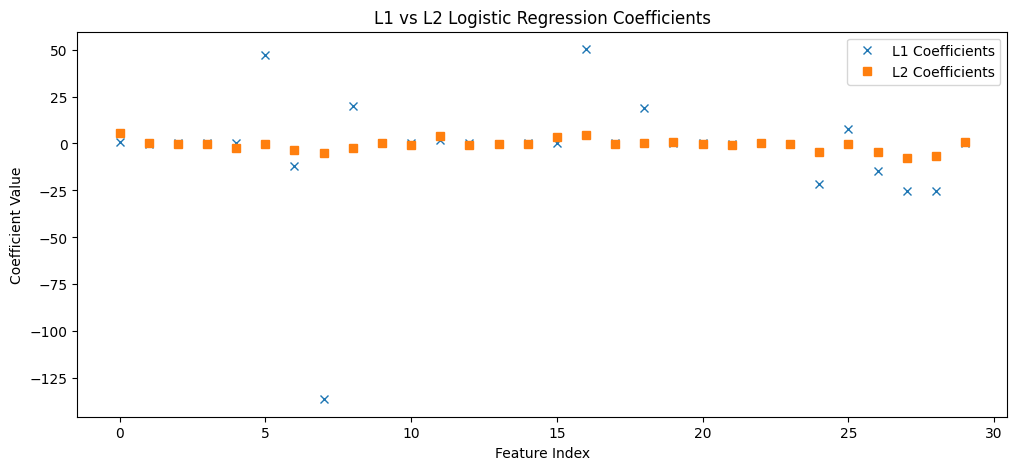

In [25]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12,5))
plt.plot(logreg_l1.coef_.ravel(), 'x', label='L1 Coefficients')
plt.plot(logreg_l2.coef_.ravel(), 's', label='L2 Coefficients')
plt.xlabel('Feature Index')
plt.ylabel('Coefficient Value')
plt.title('L1 vs L2 Logistic Regression Coefficients')
plt.legend()
plt.show()
